In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt


In [2]:
from nltk.tokenize import word_tokenize

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import seaborn as sns

In [5]:
import re
import nltk

In [6]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_tweet.csv")

In [7]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
df.shape

(31962, 3)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [10]:
print(df["tweet"][0])

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run


In [11]:
print(df["tweet"][1])

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked


In [12]:
print(df["tweet"][2])

  bihday your majesty


In [13]:
def preprocess(x):
  x= x.lower()
  x= re.sub(r"@\S+", "", x) # remove user handles like @pred
  x= re.sub(r"\s+", " ",x) #replace whitespace like \r,\n
  x= x.strip()
  return x


In [14]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [15]:
df["clean tweet"] = df["tweet"].apply(lambda x: preprocess(x))

In [16]:
df.head()

,id,label,tweet,clean tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
#remove special characters, punctuations and numbers
df["clean tweet"] = df["clean tweet"].str.replace("[^a-zA-Z#]", " ")

In [18]:
df.head()

,id,label,tweet,clean tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
tweet_tok= df["clean tweet"].apply(lambda x: x.split())

In [21]:
tweet_tok

0        [when, a, father, is, dysfunctional, and, is, ...
1        [thanks, for, #lyft, credit, i, can, t, use, c...
2                                  [bihday, your, majesty]
3        [#model, i, love, u, take, with, u, all, the, ...
4                  [factsguide, society, now, #motivation]
                               ...                        
31957                              [ate, isz, that, youuu]
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, a, monday, mor...
31960    [#sikh, #temple, vandalised, in, in, #calgary,...
31961                       [thank, you, for, you, follow]
Name: clean tweet, Length: 31962, dtype: object

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
## lemmatize

lem= WordNetLemmatizer()

In [24]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [26]:
tweet_tok= tweet_tok.apply(lambda x: [lem.lemmatize(word) for word in x])

In [27]:
tweet_tok.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: clean tweet, dtype: object

In [28]:
# combine into single sentence

for i in range(len(tweet_tok)):
  tweet_tok[i]= " ".join(tweet_tok[i])

In [29]:
tweet_tok[0]

'when a father is dysfunctional and is so selfish he drag his kid into his dysfunction #run'

In [30]:
df["clean tweet"] = tweet_tok
df.head()

,id,label,tweet,clean tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [31]:
#visualize frequent words

words= " ".join([sent for sent in df["clean tweet"]])

In [32]:
from wordcloud import WordCloud

In [33]:
wc= WordCloud(width= 750, height= 600, random_state= 10, max_font_size= 100 ).generate(words)

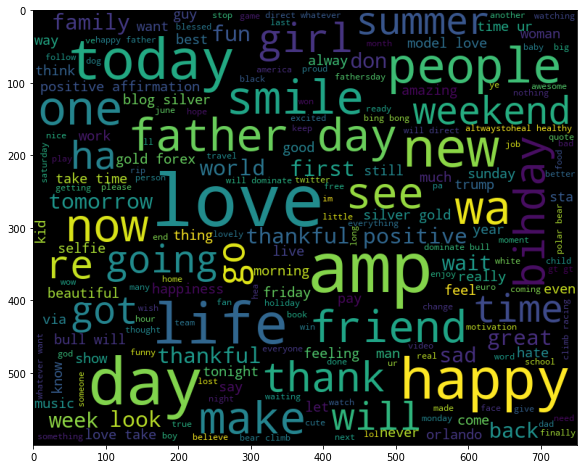

In [34]:
#plotting graph

plt.figure(figsize= (15,8))
plt.imshow(wc)
plt.show()

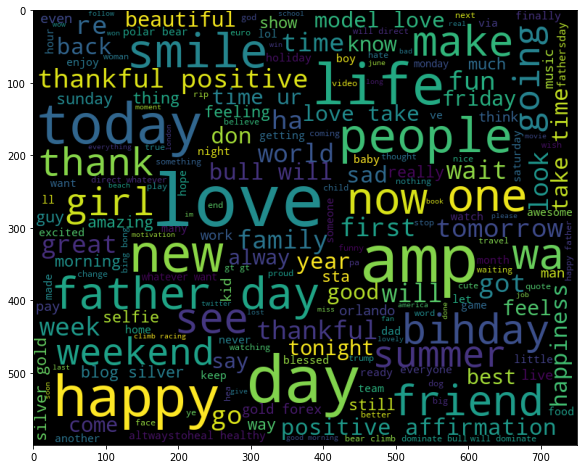

In [35]:
# freq word visualization for positive
words_positive= " ".join([sent for sent in df[df["label"]==0]["clean tweet"]])
wc= WordCloud(width= 750, height= 600, random_state= 10, max_font_size= 100 ).generate(words_positive)
plt.figure(figsize= (15,8))
plt.imshow(wc)
plt.show()


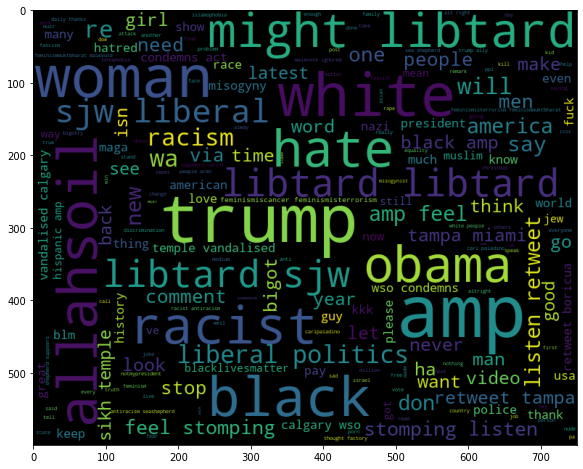

In [36]:
# freq word visualization for negative
words_negative= " ".join([sent for sent in df[df["label"]==1]["clean tweet"]])
wc= WordCloud(width= 750, height= 600, random_state= 10, max_font_size= 100 ).generate(words_negative)
plt.figure(figsize= (15,8))
plt.imshow(wc)
plt.show()


In [37]:
import re

In [38]:
#hashtag extraction

def extr_hash(tweet):
  tag= []
  for word in tweet:
    ht= re.findall(r"#(\w+)", word)
    tag.append(ht)
  return tag

In [39]:
# extract hashtags from non-racist/non-sexist tweets
tag_positive = extr_hash(df[df["label"]==0]["clean tweet"])


In [40]:
# extract hashtags from racist/sexist tweets
tag_negative = extr_hash(df[df["label"]==1]["clean tweet"])

In [41]:
tag_positive[0:5]

[['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]

In [42]:
tag_negative[0:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [43]:
#unnesting list

tag_pos= sum(tag_positive,[])
tag_neg= sum(tag_negative,[])

In [44]:
tag_pos[0:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [51]:
frq = nltk.FreqDist(tag_pos)
df2= pd.DataFrame({"Positive Hashtag": list(frq.keys()), 
                   "Count": list(frq.values())})

In [52]:
df2.head()

,Positive Hashtag,Count
0,run,34
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,365


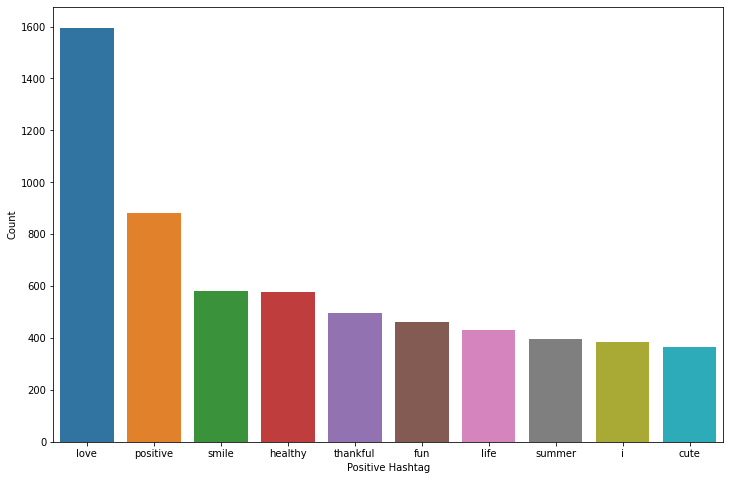

In [53]:
#top 10 positive tags

t10_pos= df2.sort_values("Count", ascending= False).head(10)

plt.figure(figsize= (12,8))
sns.barplot(data= t10_pos, x= "Positive Hashtag", y= "Count")
plt.show()

In [54]:
frq2 = nltk.FreqDist(tag_neg)
df3= pd.DataFrame({"Negative Hashtag": list(frq2.keys()), 
                   "Count": list(frq2.values())})

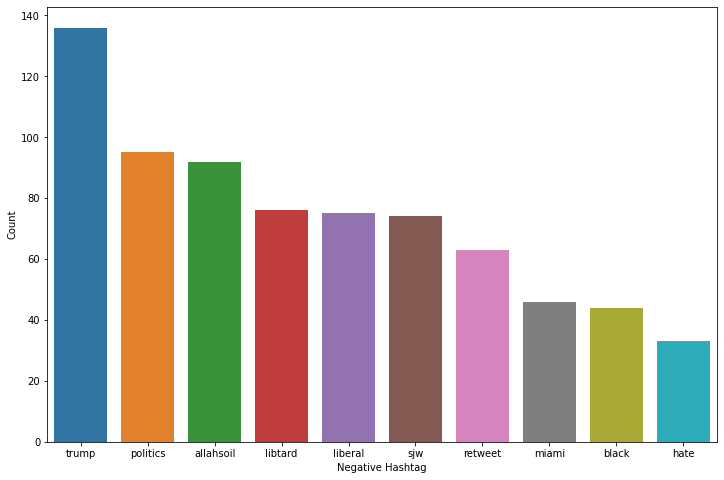

In [55]:
#top 10 negative tags

t10_neg= df3.sort_values("Count", ascending= False).head(10)

plt.figure(figsize= (12,8))
sns.barplot(data= t10_neg, x= "Negative Hashtag", y= "Count")
plt.show()

In [56]:
from sklearn.feature_extraction.text import  CountVectorizer

In [57]:
bag_vec= CountVectorizer(max_df= 0.9, min_df= 2,  stop_words= "english", max_features= 1000)

bag= bag_vec.fit_transform(df["clean tweet"])

In [58]:
bag

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 126863 stored elements in Compressed Sparse Row format>

## Modelling

In [59]:
from sklearn.model_selection import train_test_split 

In [60]:
xtrain, xtest, ytrain, ytest= train_test_split(bag, df["label"],  test_size= 0.25,random_state= 10)

In [61]:
from sklearn.linear_model import LogisticRegression

In [63]:
from sklearn.metrics import f1_score, recall_score, accuracy_score

In [64]:
lr= LogisticRegression()


In [65]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [66]:
ypred= lr.predict(xtest)

In [67]:
accuracy_score(ytest, ypred)

0.9491928419471906

In [69]:
f1_score(ytest, ypred)

0.518957345971564